In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Since the number of columns are more, we are adjusting the output window to max.

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

# pd.reset_option('display.max_columns')

In [3]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

## Reading the data

In [4]:
# Reding data and storing to 'df'

lead = pd.read_csv('Leads.csv')

In [5]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


- Inspecting the datafram

In [6]:
# Check the number of rows and columns in the dataframe
lead.shape

(9240, 37)

In [7]:
# Check the column-wise info of the dataframe
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
# Check the summary for the numeric columns 
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Data Quality check and corrections:

- ## Replacing `Select` values with NaN 

- `Select` value is observed in below columns which may be because the fields may not be mandatroy within the form.
- And so, the people willing to enroll in the course wouldn't have opted for a drop down option or missed to give a value while filling the form.
- hence, these values can be considered as Null or missing values.
- Let us replace these values with NaN at present and move ahead with missing value treatments.

In [9]:
# Fields with Select values and the no:of values in the field:

select_cl = []

for i in lead.columns:
    
    if ('Select' or 'select') in lead[i].value_counts():
        print('{} >>> Count : {} \n'.format(i,lead[lead[i]=='Select'].shape[0]))
        select_cl.append(i)

Specialization >>> Count : 1942 

How did you hear about X Education >>> Count : 5043 

Lead Profile >>> Count : 4146 

City >>> Count : 2249 



In [10]:
# Variable representing these columns with Select values in it

select_cl

['Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 'City']

In [11]:
# Replacing Select values with NaN

for i in lead.columns:
    if 'Select' in lead[i].value_counts():
        lead = lead.replace('Select',np.nan)
        
    elif 'select' in lead[i].value_counts():
        lead = lead.replace('select',np.nan)
        

In [12]:
# Re-checking if select value is available or not

for i in lead.columns:
    
    if ('Select' or 'select') in lead[i].value_counts():
        print('{} >>> Count : {} \n'.format(i,lead[lead[i]=='Select'].shape[0]))
             

- ## Checking for null / Missing values in dataframe

In [13]:
# Check for null/missing values in dataframe

missing_data = ((lead.isnull().sum(axis = 0)/len(lead.index))*100).round(2)
a_missing_data_df = pd.DataFrame(missing_data)
a_missing_data_df = a_missing_data_df.rename(columns={0: "Missing_value_ratio"})
a_missing_data_df

,Missing_value_ratio
Prospect ID,0.00
Lead Number,0.00
Lead Origin,0.00
Lead Source,0.39
Do Not Email,0.00
Do Not Call,0.00
Converted,0.00
TotalVisits,1.48
Total Time Spent on Website,0.00
Page Views Per Visit,1.48


In [14]:
a_missing_data_df[a_missing_data_df.Missing_value_ratio!=0].shape

(17, 1)

**Dropping Missing fields with `Missing value ratio > 40%`**

In [15]:
drop1 = list(a_missing_data_df[a_missing_data_df.Missing_value_ratio>40].index)

# No:of of rows removed with missing value ratio > 40
len(drop1)

7

In [16]:
# Dropping the columns

lead.drop(drop1, axis=1, inplace=True)

In [17]:
# Revisting missing values

missing_data = ((lead.isnull().sum(axis = 0)/len(lead.index))*100).round(2)
a_missing_data_df = pd.DataFrame(missing_data)
a_missing_data_df = a_missing_data_df.rename(columns={0: "Missing_value_ratio"})
a_missing_data_df[a_missing_data_df.Missing_value_ratio!=0]

,Missing_value_ratio
Lead Source,0.39
TotalVisits,1.48
Page Views Per Visit,1.48
Last Activity,1.11
Country,26.63
Specialization,36.58
What is your current occupation,29.11
What matters most to you in choosing a course,29.32
Tags,36.29
City,39.71


### **let us go one by one**
### 1. Lead Source

In [18]:
# Dealing with missing values from field 'Lead Source'
lead['Lead Source'].value_counts(dropna=False,normalize=True)

Google               0.310390
Direct Traffic       0.275216
Olark Chat           0.189935
Organic Search       0.124892
Reference            0.057792
Welingak Website     0.015368
Referral Sites       0.013528
Facebook             0.005952
NaN                  0.003896
bing                 0.000649
google               0.000541
Click2call           0.000433
Live Chat            0.000216
Press_Release        0.000216
Social Media         0.000216
blog                 0.000108
youtubechannel       0.000108
Pay per Click Ads    0.000108
welearnblog_Home     0.000108
WeLearn              0.000108
testone              0.000108
NC_EDM               0.000108
Name: Lead Source, dtype: float64

In [19]:
# Replacing Select values with NaN

for i in lead.columns:
    if 'Select' in lead[i].value_counts():
        lead = lead.replace('Select',np.nan)
        
    elif 'select' in lead[i].value_counts():
        lead = lead.replace('select',np.nan)
        

- **We can see that there is a repeated value `Google` due to case differece**.
- **Let us convert `google` to `Google`**
- **Further impute NaN with mode, i.e. Google**

In [20]:
lead_source_mode = lead['Lead Source'].mode()[0]
lead_source_mode

'Google'

In [21]:
lead['Lead Source'] = lead['Lead Source'].replace('google','Google')
lead['Lead Source'] = lead['Lead Source'].replace(np.nan,lead_source_mode)

In [22]:
lead['Lead Source'].value_counts(dropna=False)

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
Pay per Click Ads       1
youtubechannel          1
blog                    1
welearnblog_Home        1
NC_EDM                  1
WeLearn                 1
testone                 1
Name: Lead Source, dtype: int64

In [23]:
# Merging all the values with less than 0.5% into 'Other'
threshold_percent = 0.5

series = pd.value_counts(lead['Lead Source'])
mask = (series / series.sum() * 100).lt(threshold_percent)
lead['Lead Source'] = np.where(lead['Lead Source'].isin(series[mask].index),'Other', lead['Lead Source'])
lead['Lead Source'].value_counts(dropna=False,normalize=True)

Google              0.314827
Direct Traffic      0.275216
Olark Chat          0.189935
Organic Search      0.124892
Reference           0.057792
Welingak Website    0.015368
Referral Sites      0.013528
Facebook            0.005952
Other               0.002489
Name: Lead Source, dtype: float64

### 2. Country

In [24]:
lead.Country.value_counts(dropna=False,normalize=True)

India                   0.702597
NaN                     0.266342
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Bahrain                 0.000758
Hong Kong               0.000758
Oman                    0.000649
France                  0.000649
unknown                 0.000541
Germany                 0.000433
South Africa            0.000433
Kuwait                  0.000433
Canada                  0.000433
Nigeria                 0.000433
Sweden                  0.000325
Netherlands             0.000216
Asia/Pacific Region     0.000216
Ghana                   0.000216
Bangladesh              0.000216
Italy                   0.000216
Uganda                  0.000216
Belgium                 0.000216
Philippines             0.000216
China                   0.000216
Kenya                   0.000108
Tanzania  

- **Even though the field contains 26% of Missing values we cannot drop them as the country field may act as a factor.**
- **We can impute the missing values to `unknown`**
- **`India` contirbutes to 70% of whole data, and rest 3% for other countries**.
- **We can categorize Other countries as `Non-India` and leave the unknown as-is.**

In [25]:
# We can impute the missing values to unknown

lead['Country'] = lead['Country'].replace(np.nan,'unknown')

In [26]:
# function to categorize Other countries as Indian, Non-Indian and leave the unknown as-is.
def cntry(i):
    country = i.Country
    if country == 'India':
        return('Indian') 
    elif country == 'unknown':
        return('unknown')
    else:
        return('Non_Indian')

In [27]:
# Applying the function

lead['Country'] = lead.apply(cntry,axis=1)

In [28]:
lead.Country.value_counts()

Indian        6492
unknown       2466
Non_Indian     282
Name: Country, dtype: int64

### 2. Specialization

In [29]:
lead.Specialization.value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

- **As the number of Missing values are high and since we are uncertain about the contribution from this variable:**
    - **we will impute the missing values as `Unknown`**

In [30]:
lead['Specialization'] = lead['Specialization'].replace(np.nan,'unknown')

In [31]:
lead.Specialization.value_counts(dropna=False)

unknown                              3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

### 4. What is your current occupation	

In [32]:
lead['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

- **As the number of Missing values are high and since we are uncertain about the contribution from this variable:**
    - **we will impute the missing values as `Unknown`**

In [33]:
lead['What is your current occupation']= lead['What is your current occupation'].replace(np.nan,'unknown')

In [34]:
lead['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
unknown                 2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

### 5. What matters most to you in choosing a course		

In [35]:
lead['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

- **Number of Missing values are high**
- **Values other than Better Career Prospects contribute to majorty of the variable.**
- **This means that the variable is highly imbalanced**
- **Hence this variable can be dropped from the dataset**.

In [36]:
lead.drop('What matters most to you in choosing a course', axis=1, inplace=True)

### 6. Tags

In [37]:
lead['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

- **As the number of Missing values are high and** 
- **since tags are just free comments entered upon initial intiution, we can go ahead and drop the variable**

In [38]:
lead.drop('Tags', axis=1, inplace=True)

### 7. City

In [39]:
lead.City.value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [40]:
lead.City.value_counts(dropna=False,normalize = True)

NaN                            0.397078
Mumbai                         0.348701
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

- **City contains almost 40% of values as missing, hence let us drop the variable**

In [41]:
lead.drop('City', axis=1, inplace=True)

In [42]:
# Revisting missing values

missing_data = ((lead.isnull().sum(axis = 0)/len(lead.index))*100).round(2)
a_missing_data_df = pd.DataFrame(missing_data)
a_missing_data_df = a_missing_data_df.rename(columns={0: "Missing_value_ratio"})
a_missing_data_df[a_missing_data_df.Missing_value_ratio!=0]

,Missing_value_ratio
TotalVisits,1.48
Page Views Per Visit,1.48
Last Activity,1.11


In [43]:
# count of records with missing values:

lead.isnull().sum(axis = 0)[lead.isnull().sum(axis = 0)!=0]

TotalVisits             137
Page Views Per Visit    137
Last Activity           103
dtype: int64

In [44]:
# As we can see that there are a total of 137 missing records in TotalVisits:
    
# No. of Missing values in 'Page Views Per Visit' out of missing values of TotalVisits:

lead[lead.TotalVisits.isnull()]['Page Views Per Visit'].isnull().sum(axis=0)

137

In [45]:
# No. of Missing values in 'Page Views Per Visit' out of missing values of TotalVisits:

lead[lead.TotalVisits.isnull()]['Last Activity'].isnull().sum(axis=0)

103

- **Here we can see that number of missing records from TotalVisits is comparitively less.**
- **Also, Missing values from `Page Views Per Visit` & `Last Activity` will be null as these variables are related to TotalVisit variable**
- **Hence dropping these few missing value records from the data set can eliminate the residual Missing values**

In [46]:
lead=lead[~lead.TotalVisits.isnull()]

In [47]:
# Revisting missing values

missing_data = ((lead.isnull().sum(axis = 0)/len(lead.index))*100).round(2)
a_missing_data_df = pd.DataFrame(missing_data)
a_missing_data_df = a_missing_data_df.rename(columns={0: "Missing_value_ratio"})
a_missing_data_df

,Missing_value_ratio
Prospect ID,0.0
Lead Number,0.0
Lead Origin,0.0
Lead Source,0.0
Do Not Email,0.0
Do Not Call,0.0
Converted,0.0
TotalVisits,0.0
Total Time Spent on Website,0.0
Page Views Per Visit,0.0


In [48]:
# Check the number of rows and columns in the dataframe
lead.shape

(9103, 27)

- ## Dealing with unwanted columns / fields:

In [49]:
# Checking with unique values out of dataset
lead.nunique()

Prospect ID                                 9103
Lead Number                                 9103
Lead Origin                                    4
Lead Source                                    9
Do Not Email                                   2
Do Not Call                                    2
Converted                                      2
TotalVisits                                   41
Total Time Spent on Website                 1717
Page Views Per Visit                         114
Last Activity                                 17
Country                                        3
Specialization                                19
What is your current occupation                7
Search                                         2
Magazine                                       1
Newspaper Article                              2
X Education Forums                             2
Newspaper                                      2
Digital Advertisement                          2
Through Recommendati

In [50]:
# Fields with only one repeated value in them

list(lead.nunique()[lead.nunique()==1].index)

['Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [51]:
# Checking the values available in them

for i in lead.nunique()[lead.nunique()==1].index:
    print(lead[i].value_counts(),end='\n**********\n')

No    9103
Name: Magazine, dtype: int64
**********
No    9103
Name: Receive More Updates About Our Courses, dtype: int64
**********
No    9103
Name: Update me on Supply Chain Content, dtype: int64
**********
No    9103
Name: Get updates on DM Content, dtype: int64
**********
No    9103
Name: I agree to pay the amount through cheque, dtype: int64
**********


- **Dropping these variables as these won't contribute towards model building:**

In [52]:
lead.drop(lead.nunique()[lead.nunique()==1].index, axis=1, inplace=True)

In [53]:
# Check the number of rows and columns in the dataframe
lead.shape

(9103, 22)

- **Removing `Prospect ID`**

In [54]:
lead[['Prospect ID']].head()

,Prospect ID
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620
1,2a272436-5132-4136-86fa-dcc88c88f482
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc
4,3256f628-e534-4826-9d63-4a8b88782852


- **`Prospect ID` represents recorded individual IDs.**
- **These variables will not be a best variable in Logistic model.**
- **Hence Dropping these variables**

In [55]:
lead.drop(['Prospect ID'], axis=1, inplace=True)

In [56]:
# Check the number of rows and columns in the dataframe
lead.shape

(9103, 21)

- ## Outlier Treatment

In [57]:
# Check the summary for the numeric columns 
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000
mean,617027.742612,0.380204,3.445238,481.350104,2.362820
std,23337.138926,0.485464,4.854853,545.066142,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596408.000000,0.000000,1.000000,9.000000,1.000000
50%,615278.000000,0.000000,3.000000,244.000000,2.000000
75%,637166.000000,1.000000,5.000000,919.500000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


- **Cecking with outliers for `TotalVisits`, `Total Time Spent on Website`, `Page Views Per Visit`.**

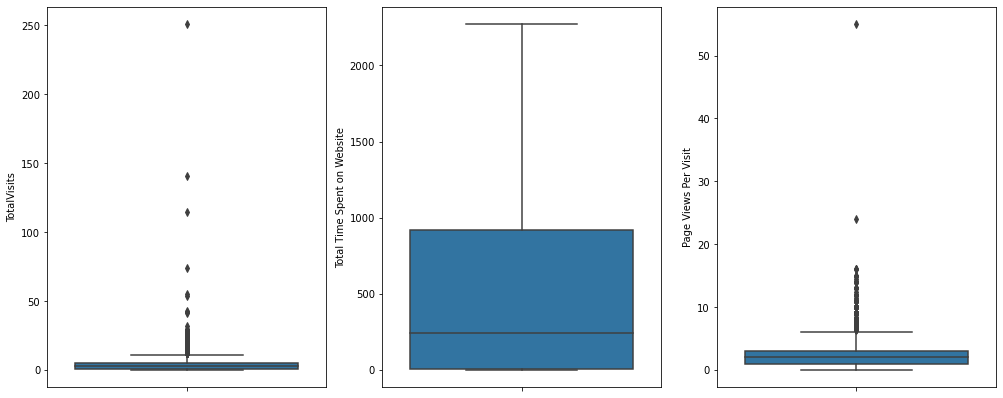

In [58]:
# plottong box plots

plt.figure(figsize = (17,7))
for i in enumerate(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']):
    plt.subplot(1,3,i[0]+1)
    sns.boxplot(x = i[1], data =lead,orient='v')

- We can clearly observe outliers within the variables `TotalVisits` & `Page Views Per Visit`.
- Let us perform a soft capping on upper ends.
- There are no outliers in lower end as negative value is not possible in these variables and it can only start from 0.


In [59]:
for i in ['TotalVisits', 'Page Views Per Visit']:
    q1 = lead[i].quantile(0.01)
    print('P10 for {} is {}'.format(i,q1))
    lead[i][lead[i]<=q1] = q1
    
    q3 = lead[i].quantile(0.99)
    print('P99 for {} is {}'.format(i,q3))
    lead[i][lead[i]>=q3] = q3


P10 for TotalVisits is 0.0
P99 for TotalVisits is 17.0
P10 for Page Views Per Visit is 0.0
P99 for Page Views Per Visit is 9.0


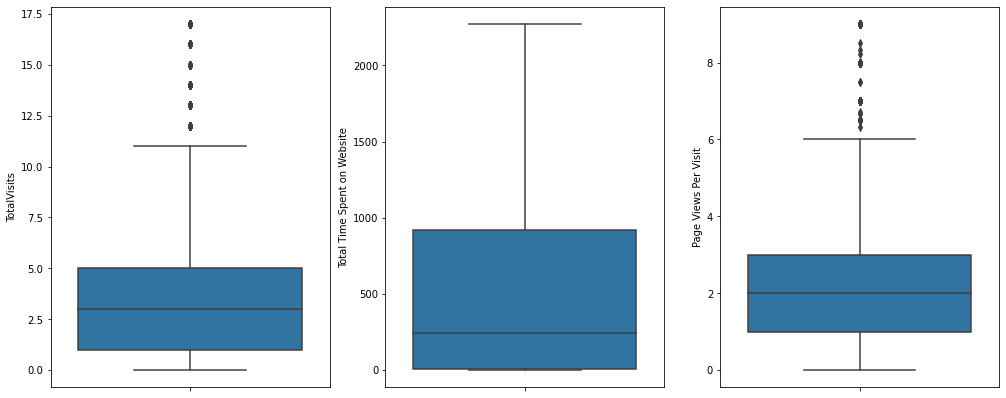

In [60]:
# plottong box plots post soft capping

plt.figure(figsize = (17,7))
for i in enumerate(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']):
    plt.subplot(1,3,i[0]+1)
    sns.boxplot(x = i[1], data =lead,orient='v')

## Visualizing the data

In [61]:
# Considering the Target variable to verify if any imbalance exists between Defaulter & a Non-Defaulter
vlv=pd.DataFrame(lead.Converted.value_counts())
vlv

,Converted
0,5642
1,3461


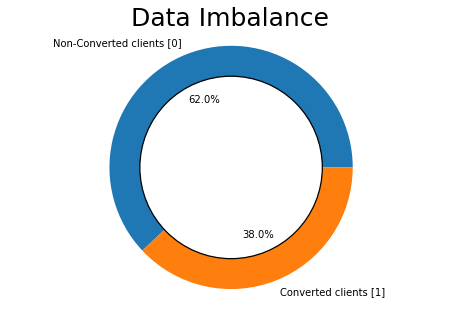

In [62]:
# plotting the above imbalance as a pie-chart for better visvualization

plt.figure(figsize=[8,5])

lbl = ['Non-Converted clients [0]','Converted clients [1]']

plt.pie(vlv, labels=lbl,autopct='%1.1f%%')

centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')

plt.title('Data Imbalance',fontsize=25)

plt.show()

#### We can see that the Non-Converted within the given data set is high when compared to Converted customers:
- Non Converted totat% = **`62.0%`**
- Converted total% = **`38.0%`**

- **Converted Vs Do Not Email**

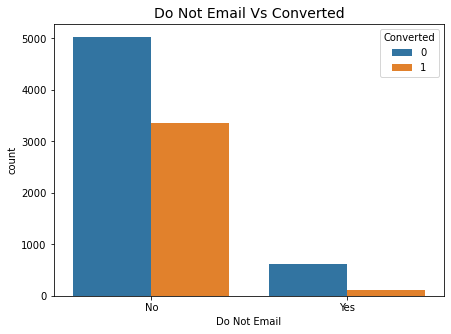

In [63]:
# To understand the trend of ppl getting converted who has opted for a email option or not:

plt.figure(figsize=(7,5))
sns.countplot('Do Not Email',hue='Converted',data=lead)
plt.title('{} Vs Converted'.format('Do Not Email'), fontsize=14)
plt.xticks(rotation=0)
plt.show()

- The people who opt for a email service have more Conversion rate than the people who haven't opted for Email service. 
- Which means that the customer gets convinced better when called by a sales representative.

- **Converted Vs Do Not Call**

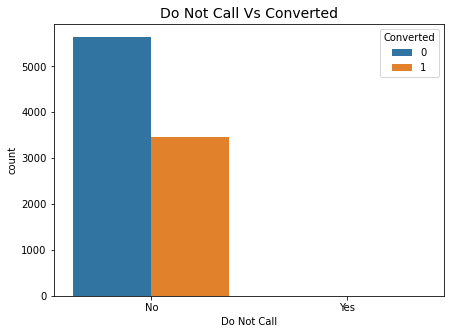

In [64]:
# To understand the trend of ppl getting converted who has opted for a calling service or not:

plt.figure(figsize=(7,5))
sns.countplot('Do Not Call',hue='Converted',data=lead)
plt.title('{} Vs Converted'.format('Do Not Call'), fontsize=14)
plt.xticks(rotation=0)
plt.show()

In [65]:
lead.pivot_table(index='Do Not Call',columns='Converted',values='TotalVisits',aggfunc='count')

Converted,0,1
Do Not Call,,
No,5642.0,3459.0
Yes,NaN,2.0


- Same trend is observed in case of ppl who opts for a call back service.

- **Convertion rate in different countries**

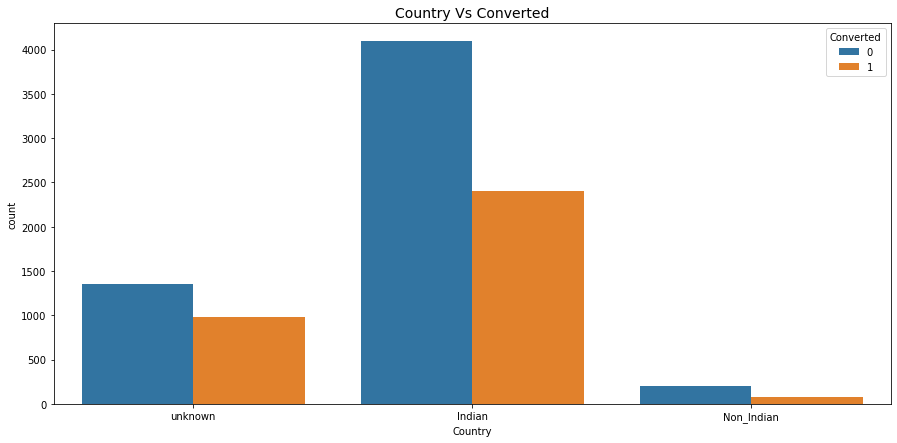

In [66]:
plt.figure(figsize=(15,7))
sns.countplot('Country',hue='Converted',data=lead)
plt.title('{} Vs Converted'.format('Country'), fontsize=14)
plt.xticks(rotation=0)
plt.show()

- As observed in previous findings, Enrollement is high from India compared to any other countries.

- **Convertion rate w.r.t specialization**

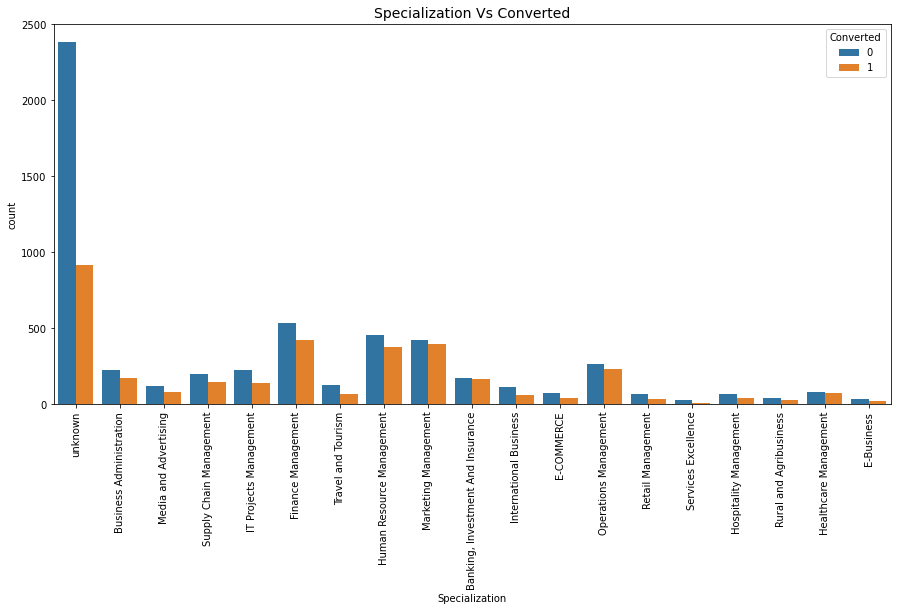

In [67]:
plt.figure(figsize=(15,7))
sns.countplot('Specialization',hue='Converted',data=lead)
plt.title('{} Vs Converted'.format('Specialization'), fontsize=14)
plt.xticks(rotation=90)
plt.show()

- We can observe a comparatively better counts of conversion rate in :
    - Finance Management, Human Resource Management, Marketing Management & Operations Management


- **Convertion rate w.r.t Occupation**

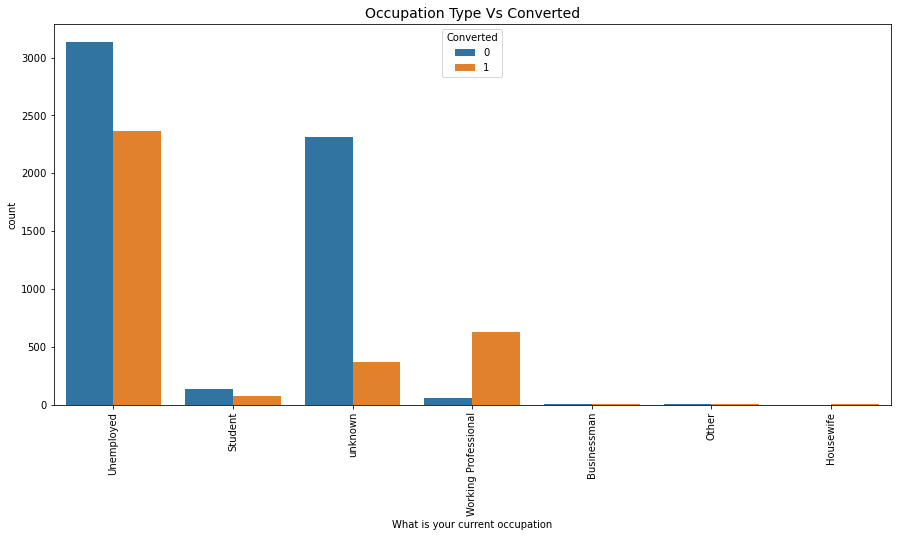

In [68]:
plt.figure(figsize=(15,7))
sns.countplot('What is your current occupation',hue='Converted',data=lead)
plt.title('{} Vs Converted'.format('Occupation Type'), fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [69]:
lead.pivot_table(index='What is your current occupation',columns='Converted',values='TotalVisits',aggfunc='count')

Converted,0,1
What is your current occupation,,
Businessman,3.0,5.0
Housewife,NaN,9.0
Other,6.0,9.0
Student,132.0,75.0
Unemployed,3133.0,2369.0
Working Professional,55.0,624.0
unknown,2313.0,370.0


- We can see a `positive convertion` rate for below applicants with Occupations:
    - Working Professional.
    - Other.
    - Housewife.
    - Businessman.

- **Convertion rate w.r.t Newspaper**

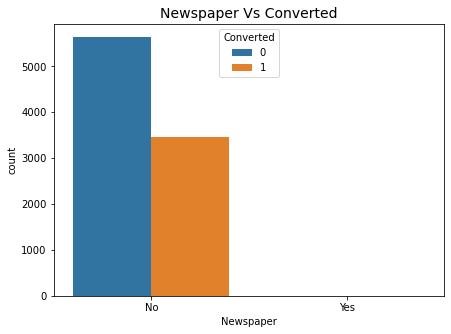

In [70]:
plt.figure(figsize=(7,5))
sns.countplot('Newspaper',hue='Converted',data=lead)
plt.title('{} Vs Converted'.format('Newspaper'), fontsize=14)
plt.xticks(rotation=0)
plt.show()

In [71]:
lead.pivot_table(index='Newspaper',columns='Converted',values='TotalVisits',aggfunc='count')

Converted,0,1
Newspaper,,
No,5641.0,3461.0
Yes,1.0,NaN


- Since only one person has enrolled by observing the add through Newspaper, we can drop the column.
- This is certainly an imbalance.

In [72]:
lead.pivot_table(index='X Education Forums',columns='Converted',values='TotalVisits',aggfunc='count')

Converted,0,1
X Education Forums,,
No,5641.0,3461.0
Yes,1.0,NaN


In [73]:
lead.pivot_table(index='Newspaper Article',columns='Converted',values='TotalVisits',aggfunc='count')

Converted,0,1
Newspaper Article,,
No,5641,3460
Yes,1,1


In [74]:
# Dropping Newspaper, X Education Forums, Newspaper Article

lead.drop(['Newspaper', 'X Education Forums', 'Newspaper Article'], axis=1, inplace=True)

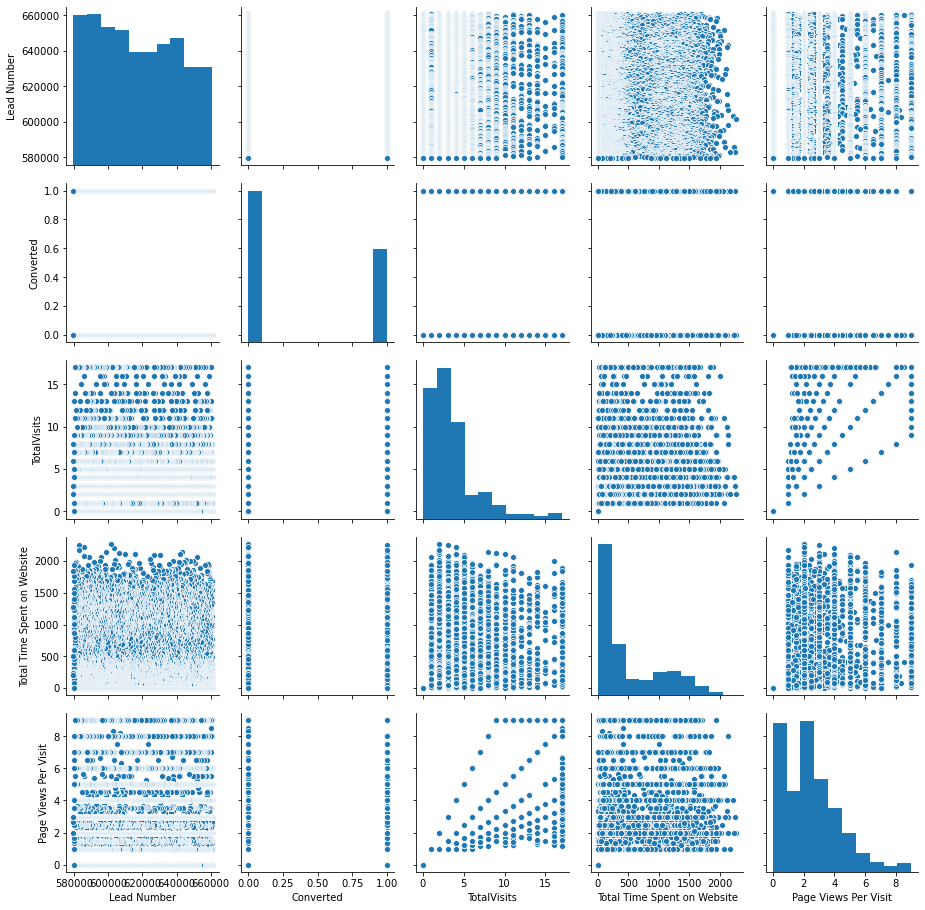

In [75]:
# Let's make a pairplot of all the numeric variables
sns.pairplot(lead)
plt.show()

- **We can see a linear relationship between Page Views per visit & TotalVisits.**
- **Total Spent in website is comparitively less**
- **For `TotalVisits` data is left skewed but normally distributed**
- **Let us drop either of 3 variables, let us drop `Page Views Per Visit`**

In [76]:
# Dropping 'Page Views Per Visit' due to correlation and similarity.
lead.drop(['Page Views Per Visit'], axis=1, inplace=True)
lead.shape

(9103, 17)

In [77]:
# Also, Dropping 'Last Notable Activity' as it is similar to 'last Activity'
lead.drop('Last Notable Activity',axis=1,inplace=True)
lead.shape

(9103, 16)

## Dummy Variables

- **Converting Yes/No to 1/0:**

In [78]:
# Dynamic Segregation of fields that needed to be converted to 1/0 , character based with unknown values, 
# charachter based w/o unknown and numerical based : 


varlist = []
charlist = []
char_w_unknown = []
numlist=[]

for i in lead.columns:
    if lead[i].dtype=='object' :
        
        if (('no' in [x.lower() for x in lead[i].unique()]) and 
            ('yes' in [x.lower() for x in lead[i].unique()])) :
            
            varlist.append(i)
            
        elif (('no' not in [x.lower() for x in lead[i].unique()]) and 
            ('yes' not in [x.lower() for x in lead[i].unique()])) :
            
            if 'unknown' not in [x.lower() for x in lead[i].unique()] :
                
                charlist.append(i)
                
            elif 'unknown' in [x.lower() for x in lead[i].unique()]:
                
                char_w_unknown.append(i)
    else:
            numlist.append(i)
            

- Varlist consists of variables with yes/no values that's needed to be converted to 1/0 ( binary )
- charlist consists of variables without an unknown value in them.
- char_w_unknown consists of variables with unknown values.
- rest numerical variables witll be appended into numlist.


In [79]:
print('\nFields with Yes/No: {}\n\n\nFields with unknown Characters: {}\n\n\nFields to be left as Characters: {}\n\n\nFields with numerical values: {}'
      .format(varlist,char_w_unknown,charlist,numlist))


Fields with Yes/No: ['Do Not Email', 'Do Not Call', 'Search', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']


Fields with unknown Characters: ['Country', 'Specialization', 'What is your current occupation']


Fields to be left as Characters: ['Lead Origin', 'Lead Source', 'Last Activity']


Fields with numerical values: ['Lead Number', 'Converted', 'TotalVisits', 'Total Time Spent on Website']


In [80]:
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the varlist
lead[varlist] = lead[varlist].apply(binary_map)

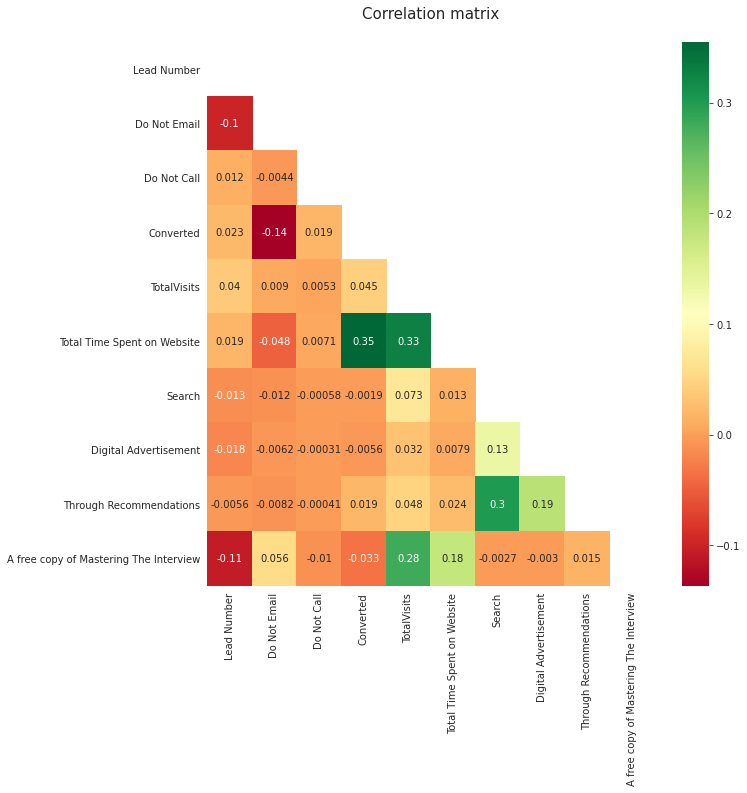

In [81]:
# Correlation plot among the numerical variables:

plt.figure(figsize=[10,10])
corr = lead.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    sns.heatmap(corr,mask=mask,cmap="RdYlGn",annot=True)
plt.title('Correlation matrix\n',fontdict={'fontsize':15,'fontweight':5})
plt.show()

- **Correlation values are lying between -0.11 to 0.35 which means that we do not have strong correlation between the variables.**


In [82]:
for i in charlist+char_w_unknown:
    print('*****',i,'contains',lead[i].nunique(),'values****\n',lead[i].value_counts(normalize=True),'\n')

***** Lead Origin contains 4 values****
 Landing Page Submission    0.536746
API                        0.393057
Lead Add Form              0.066791
Lead Import                0.003405
Name: Lead Origin, dtype: float64 

***** Lead Source contains 9 values****
 Google              0.318796
Direct Traffic      0.279358
Olark Chat          0.192574
Organic Search      0.126771
Reference           0.048665
Welingak Website    0.014171
Referral Sites      0.013732
Facebook            0.003405
Other               0.002527
Name: Lead Source, dtype: float64 

***** Last Activity contains 17 values****
 Email Opened                    0.377568
SMS Sent                        0.300780
Olark Chat Conversation         0.106778
Page Visited on Website         0.070306
Converted to Lead               0.047017
Email Bounced                   0.034274
Email Link Clicked              0.029331
Form Submitted on Website       0.012743
Unreachable                     0.009887
Unsubscribed                

In [83]:
# Last Activity: Merging all the values with less than 0.5% into 'Other'.
threshold_percent = 0.10

series = pd.value_counts(lead['Last Activity'])
mask = (series / series.sum() * 100).lt(threshold_percent)
lead['Last Activity'] = np.where(lead['Last Activity'].isin(series[mask].index),'Other', lead['Last Activity'])
lead['Last Activity'].value_counts(dropna=False,normalize=True)

Email Opened                 0.377568
SMS Sent                     0.300780
Olark Chat Conversation      0.106778
Page Visited on Website      0.070306
Converted to Lead            0.047017
Email Bounced                0.034274
Email Link Clicked           0.029331
Form Submitted on Website    0.012743
Unreachable                  0.009887
Unsubscribed                 0.006701
Had a Phone Conversation     0.002746
Other                        0.001868
Name: Last Activity, dtype: float64

In [84]:
# Dummy encoding by dropping first column from variables without a 'unknown' value:

dummy1 = pd.get_dummies(lead[charlist], drop_first=True)
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [85]:
lead = pd.concat([lead,dummy1], axis=1)
lead.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Last Activity,Country,Specialization,What is your current occupation,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed
0,660737,API,Olark Chat,0,0,0,0.0,0,Page Visited on Website,unknown,unknown,Unemployed,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,660728,API,Organic Search,0,0,0,5.0,674,Email Opened,Indian,unknown,Unemployed,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,Email Opened,Indian,Business Administration,Student,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,Unreachable,Indian,Media and Advertising,Unemployed,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,Converted to Lead,Indian,unknown,Unemployed,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [86]:
# Dummy encoding by dropping column from variables with 'unknown' value:

for i in char_w_unknown:
    dm1 = pd.get_dummies(lead[i], prefix=i)
    x = i+'_unknown'
    dm11 = dm1.drop([x],axis = 1)
    lead = pd.concat([lead,dm11],axis=1)

In [87]:
# Removing existing categorical variables post dummy encoding

lead = lead.drop(char_w_unknown+charlist, axis=1)
lead.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Country_Indian,Country_Non_Indian,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,660737,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,660728,0,0,0,5.0,674,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,660727,0,0,1,2.0,1532,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,660719,0,0,0,1.0,305,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,660681,0,0,1,2.0,1428,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


## Test-Train Split

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
# Putting feature variable to X

X = lead.drop(['Converted','Lead Number'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Country_Indian,Country_Non_Indian,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,5.0,674,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,2.0,1532,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,2.0,1428,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [90]:
# Putting response variable to y

y = lead['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [91]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Rescaling the features

In [92]:
# Numerical fields to be converted

numlist.remove('Lead Number')
numlist.remove('Converted')
numlist

['TotalVisits', 'Total Time Spent on Website']

In [93]:
X_train[numlist].head()

,TotalVisits,Total Time Spent on Website
7962,3.0,1286
5520,7.0,60
1962,5.0,169
1566,14.0,1241
9170,0.0,0


In [94]:
from sklearn.preprocessing import StandardScaler

In [95]:
scaler = StandardScaler()

X_train[numlist] = scaler.fit_transform(X_train[numlist])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Country_Indian,Country_Non_Indian,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
7962,0,0,-0.105932,1.476324,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5520,0,0,1.113025,-0.771066,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1962,0,0,0.503547,-0.571257,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1566,0,0,3.246199,1.393834,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
9170,0,0,-1.020149,-0.881052,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [96]:
### Checking the Convertion Rate
convertion = (sum(lead['Converted'])/len(lead['Converted'].index))*100
convertion

38.02043282434362

- **We have Almost 38% convertion rate**

In [97]:
X_train.shape

(6372, 56)

## Model Building

In [98]:
import statsmodels.api as sm

In [99]:
# Creating functions for fitting logistic regression model, calculating VIF score and checking the accuracy for ease of use!

# For fitting logitis regression
def stats_model():
    X_train_sm = sm.add_constant(X_train_new)
    logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res=logm1.fit()
    return res.summary()

# For calculating the VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif():
    vif = pd.DataFrame()
    vif['features'] = X_train_new.columns
    vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending=False)
    return vif

# For calculating the Accuracy
from sklearn import metrics

def check_accuracy():
    X_train_sm = sm.add_constant(X_train_new)
    logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res=logm1.fit()
    y_train_pred = res.predict(X_train_sm)
    y_train_pred = y_train_pred.values.reshape(-1)
    y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
    y_train_pred_final['Lead Number'] = y_train.index
    y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
    confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
    return metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

## Feature Selection Using RFE

In [100]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [101]:
from sklearn.feature_selection import RFE

# Running RFE with 30 variables as output

rfe = RFE(logreg, 30)
rfe = rfe.fit(X_train, y_train)

In [102]:
rfe.support_

array([ True, False, False,  True, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
        True, False, False,  True, False,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False, False,  True,  True, False,  True, False, False,
       False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True])

In [103]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 10),
 ('TotalVisits', False, 16),
 ('Total Time Spent on Website', True, 1),
 ('Search', False, 21),
 ('Digital Advertisement', False, 14),
 ('Through Recommendations', False, 13),
 ('A free copy of Mastering The Interview', False, 24),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 26),
 ('Lead Source_Facebook', False, 23),
 ('Lead Source_Google', False, 15),
 ('Lead Source_Olark Chat', False, 11),
 ('Lead Source_Organic Search', False, 25),
 ('Lead Source_Other', False, 17),
 ('Lead Source_Reference', False, 19),
 ('Lead Source_Referral Sites', False, 18),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 22),
 ('Last Activity_Email Link Clicked', False, 12),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 20),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Ac

In [104]:
col = X_train.columns[rfe.support_]

In [105]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Search', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Other', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Specialization_E-COMMERCE',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_International Business',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Travel and Tourism'],
      dtype='object')

In [106]:
X_train_new = X_train[col]
X_train_new.shape

(6372, 30)

#### Assessing the model with StatsModels

### Model I

In [107]:
stats_model()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6341
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2577.1
Date:                Mon, 08 Mar 2021   Deviance:                       5154.3
Time:                        21:55:54   Pearson chi2:                 6.41e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7044      0.144    -11.872      0.000      -1.986      -1.423
Do Not Email                                            -1.3621      0.184     -7.398      0.000      -1.723      -1.001
Total Time Spent on Website                              1.1129      0.041     27.267      0.000       1.033       1.193
Lead Origin_Landing Page Submission                     -0.5455      0.098     -5.545      0.000      -0.738      -0.353
Lead Origin_Lead Add Form                                2.2791      0.231      9.853      0.000       1.826       2.733
Lead Source_Welingak Website                             2.0220      0.757      2.672      0.008       0.539       3.505
Last Activity_Email Opened                               0.7453      0.109      6.817      0.000       0.531       0.960
Last Activity_Had a Phone Conversation                   2.2508      0.639      3.523      0.000       0.999       3.503
Last Activity_Olark Chat Conversation                   -0.7209      0.186     -3.882      0.000      -1.085      -0.357
Last Activity_Other                                      1.6445      0.624      2.634      0.008       0.421       2.868
Last Activity_SMS Sent                                   1.8978      0.111     17.045      0.000       1.680       2.116
Last Activity_Unreachable                                0.9969      0.308      3.238      0.001       0.393       1.600
Last Activity_Unsubscribed                               1.6472      0.479      3.442      0.001       0.709       2.585
Country_Indian                                          -1.1033      0.120     -9.211      0.000      -1.338      -0.869
Country_Non_Indian                                      -1.2159      0.227     -5.366      0.000      -1.660      -0.772
Specialization_Banking, Investment And Insurance         0.6382      0.188      3.386      0.001       0.269       1.008
Specialization_Business Administration                   0.3551      0.180      1.971      0.049       0.002       0.708
Specialization_E-Business                                1.1825      0.420      2.815      0.005       0.359       2.006
Specialization_Finance Management                        0.4211      0.125      3.359      0.001       0.175       0.667
Specialization_Human Resource Management                 0.3883      0.130      2.985      0.003       0.133       0.643
Specialization_IT Projects Management                    0.4335      0.194      2.235      0.025       0.053       0.814
Specialization_Marketing Management                      0.5460      0.129      4.224      0.000       0.293       0.799
Specialization_Rural and Agribusiness                    0

In [108]:
check_accuracy()

0.8184243565599498

In [109]:
calc_vif()

,features,VIF
12,Country_Indian,5.71
2,Lead Origin_Landing Page Submission,4.42
28,What is your current occupation_Unemployed,3.01
5,Last Activity_Email Opened,2.23
9,Last Activity_SMS Sent,2.08
3,Lead Origin_Lead Add Form,1.81
17,Specialization_Finance Management,1.42
29,What is your current occupation_Working Profes...,1.39
20,Specialization_Marketing Management,1.35
18,Specialization_Human Resource Management,1.35


- **We can see a high p-value for column `What is your current occupation_Housewife`.**
- **Let us drop the column.**

### Model II

In [110]:
# Model -#2
X_train_new = X_train_new.drop(['What is your current occupation_Housewife'],axis=1)
stats_model()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6342
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2589.1
Date:                Mon, 08 Mar 2021   Deviance:                       5178.2
Time:                        21:55:55   Pearson chi2:                 6.44e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6743      0.143    -11.732      0.000      -1.954      -1.395
Do Not Email                                            -1.3666      0.184     -7.431      0.000      -1.727      -1.006
Total Time Spent on Website                              1.1119      0.041     27.317      0.000       1.032       1.192
Lead Origin_Landing Page Submission                     -0.5361      0.098     -5.465      0.000      -0.728      -0.344
Lead Origin_Lead Add Form                                2.3103      0.232      9.976      0.000       1.856       2.764
Lead Source_Welingak Website                             2.0003      0.757      2.643      0.008       0.517       3.484
Last Activity_Email Opened                               0.7429      0.109      6.825      0.000       0.530       0.956
Last Activity_Had a Phone Conversation                   2.2410      0.638      3.511      0.000       0.990       3.492
Last Activity_Olark Chat Conversation                   -0.7302      0.185     -3.940      0.000      -1.093      -0.367
Last Activity_Other                                      1.6387      0.623      2.629      0.009       0.417       2.860
Last Activity_SMS Sent                                   1.8834      0.111     16.983      0.000       1.666       2.101
Last Activity_Unreachable                                0.9830      0.308      3.195      0.001       0.380       1.586
Last Activity_Unsubscribed                               1.6356      0.478      3.419      0.001       0.698       2.573
Country_Indian                                          -1.0975      0.120     -9.182      0.000      -1.332      -0.863
Country_Non_Indian                                      -1.2177      0.226     -5.382      0.000      -1.661      -0.774
Specialization_Banking, Investment And Insurance         0.6279      0.188      3.336      0.001       0.259       0.997
Specialization_Business Administration                   0.3690      0.179      2.057      0.040       0.017       0.721
Specialization_E-Business                                1.1683      0.420      2.782      0.005       0.345       1.991
Specialization_Finance Management                        0.4218      0.125      3.380      0.001       0.177       0.666
Specialization_Human Resource Management                 0.3899      0.130      3.003      0.003       0.135       0.644
Specialization_IT Projects Management                    0.4244      0.194      2.191      0.028       0.045       0.804
Specialization_Marketing Management                      0.5367      0.129      4.158      0.000       0.284       0.790
Specialization_Rural and Agribusiness                    0

In [111]:
check_accuracy()

0.8177966101694916

In [112]:
calc_vif()

,features,VIF
12,Country_Indian,5.71
2,Lead Origin_Landing Page Submission,4.42
27,What is your current occupation_Unemployed,3.00
5,Last Activity_Email Opened,2.23
9,Last Activity_SMS Sent,2.08
3,Lead Origin_Lead Add Form,1.81
17,Specialization_Finance Management,1.42
28,What is your current occupation_Working Profes...,1.39
20,Specialization_Marketing Management,1.35
18,Specialization_Human Resource Management,1.35


- **We can see a high p-value for column `Specialization_Rural and Agribusiness`.**
- **Let us drop the column.**

### Model III

In [113]:
# Model - #3
X_train_new = X_train_new.drop(['Specialization_Rural and Agribusiness'],axis=1)
stats_model()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6343
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2590.0
Date:                Mon, 08 Mar 2021   Deviance:                       5180.1
Time:                        21:55:56   Pearson chi2:                 6.43e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6697      0.143    -11.707      0.000      -1.949      -1.390
Do Not Email                                            -1.3683      0.184     -7.439      0.000      -1.729      -1.008
Total Time Spent on Website                              1.1129      0.041     27.341      0.000       1.033       1.193
Lead Origin_Landing Page Submission                     -0.5216      0.097     -5.351      0.000      -0.713      -0.331
Lead Origin_Lead Add Form                                2.3137      0.232      9.993      0.000       1.860       2.768
Lead Source_Welingak Website                             1.9942      0.757      2.635      0.008       0.511       3.477
Last Activity_Email Opened                               0.7429      0.109      6.826      0.000       0.530       0.956
Last Activity_Had a Phone Conversation                   2.2345      0.638      3.501      0.000       0.983       3.486
Last Activity_Olark Chat Conversation                   -0.7334      0.185     -3.959      0.000      -1.096      -0.370
Last Activity_Other                                      1.6367      0.624      2.625      0.009       0.415       2.859
Last Activity_SMS Sent                                   1.8803      0.111     16.965      0.000       1.663       2.098
Last Activity_Unreachable                                0.9883      0.307      3.220      0.001       0.387       1.590
Last Activity_Unsubscribed                               1.6486      0.480      3.437      0.001       0.709       2.589
Country_Indian                                          -1.0979      0.119     -9.189      0.000      -1.332      -0.864
Country_Non_Indian                                      -1.2203      0.226     -5.396      0.000      -1.664      -0.777
Specialization_Banking, Investment And Insurance         0.6104      0.188      3.251      0.001       0.242       0.978
Specialization_Business Administration                   0.3514      0.179      1.965      0.049       0.001       0.702
Specialization_E-Business                                1.1492      0.420      2.738      0.006       0.327       1.972
Specialization_Finance Management                        0.4042      0.124      3.257      0.001       0.161       0.647
Specialization_Human Resource Management                 0.3729      0.129      2.887      0.004       0.120       0.626
Specialization_IT Projects Management                    0.4067      0.193      2.105      0.035       0.028       0.785
Specialization_Marketing Management                      0.5204      0.128      4.051      0.000       0.269       0.772
Specialization_Services Excellence                       1

In [114]:
check_accuracy()

0.8181104833647207

In [115]:
calc_vif()

,features,VIF
12,Country_Indian,5.71
2,Lead Origin_Landing Page Submission,4.37
26,What is your current occupation_Unemployed,3.00
5,Last Activity_Email Opened,2.23
9,Last Activity_SMS Sent,2.08
3,Lead Origin_Lead Add Form,1.81
17,Specialization_Finance Management,1.40
27,What is your current occupation_Working Profes...,1.39
4,Lead Source_Welingak Website,1.34
20,Specialization_Marketing Management,1.34


- **We can see a high p-value for column `Specialization_Services Excellence`.**
- **Let us drop the column.**

### Model IV

In [116]:
# Model - #4
X_train_new = X_train_new.drop(['Specialization_Services Excellence'],axis=1)
stats_model()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6344
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2591.6
Date:                Mon, 08 Mar 2021   Deviance:                       5183.2
Time:                        21:55:57   Pearson chi2:                 6.43e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6688      0.143    -11.708      0.000      -1.948      -1.389
Do Not Email                                            -1.3517      0.183     -7.370      0.000      -1.711      -0.992
Total Time Spent on Website                              1.1120      0.041     27.336      0.000       1.032       1.192
Lead Origin_Landing Page Submission                     -0.5121      0.097     -5.265      0.000      -0.703      -0.321
Lead Origin_Lead Add Form                                2.3238      0.232     10.037      0.000       1.870       2.778
Lead Source_Welingak Website                             1.9781      0.757      2.614      0.009       0.495       3.461
Last Activity_Email Opened                               0.7421      0.109      6.824      0.000       0.529       0.955
Last Activity_Had a Phone Conversation                   2.2294      0.638      3.494      0.000       0.979       3.480
Last Activity_Olark Chat Conversation                   -0.7296      0.185     -3.941      0.000      -1.092      -0.367
Last Activity_Other                                      1.6354      0.624      2.623      0.009       0.413       2.858
Last Activity_SMS Sent                                   1.8801      0.111     16.975      0.000       1.663       2.097
Last Activity_Unreachable                                0.9830      0.307      3.204      0.001       0.382       1.584
Last Activity_Unsubscribed                               1.6303      0.479      3.401      0.001       0.691       2.570
Country_Indian                                          -1.0953      0.119     -9.174      0.000      -1.329      -0.861
Country_Non_Indian                                      -1.2230      0.226     -5.410      0.000      -1.666      -0.780
Specialization_Banking, Investment And Insurance         0.5987      0.188      3.193      0.001       0.231       0.966
Specialization_Business Administration                   0.3390      0.179      1.898      0.058      -0.011       0.689
Specialization_E-Business                                1.1361      0.419      2.708      0.007       0.314       1.958
Specialization_Finance Management                        0.3924      0.124      3.168      0.002       0.150       0.635
Specialization_Human Resource Management                 0.3616      0.129      2.804      0.005       0.109       0.614
Specialization_IT Projects Management                    0.3942      0.193      2.043      0.041       0.016       0.772
Specialization_Marketing Management                      0.5094      0.128      3.972      0.000       0.258       0.761
Specialization_Supply Chain Management                   0

In [117]:
check_accuracy()

0.8179535467671061

In [118]:
calc_vif()

,features,VIF
12,Country_Indian,5.71
2,Lead Origin_Landing Page Submission,4.35
25,What is your current occupation_Unemployed,3.00
5,Last Activity_Email Opened,2.23
9,Last Activity_SMS Sent,2.08
3,Lead Origin_Lead Add Form,1.81
17,Specialization_Finance Management,1.40
26,What is your current occupation_Working Profes...,1.39
4,Lead Source_Welingak Website,1.34
20,Specialization_Marketing Management,1.33


- **We can see a high p-value for column `What is your current occupation_Businessman`.**
- **Let us drop the column.**

### Model V

In [119]:
# Model - #5
X_train_new = X_train_new.drop(['What is your current occupation_Businessman'],axis=1)
stats_model()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6345
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2593.1
Date:                Mon, 08 Mar 2021   Deviance:                       5186.1
Time:                        21:55:57   Pearson chi2:                 6.43e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6601      0.142    -11.661      0.000      -1.939      -1.381
Do Not Email                                            -1.3528      0.183     -7.376      0.000      -1.712      -0.993
Total Time Spent on Website                              1.1115      0.041     27.342      0.000       1.032       1.191
Lead Origin_Landing Page Submission                     -0.5167      0.097     -5.311      0.000      -0.707      -0.326
Lead Origin_Lead Add Form                                2.3343      0.232     10.083      0.000       1.881       2.788
Lead Source_Welingak Website                             1.9694      0.757      2.603      0.009       0.486       3.452
Last Activity_Email Opened                               0.7408      0.109      6.812      0.000       0.528       0.954
Last Activity_Had a Phone Conversation                   2.2269      0.638      3.491      0.000       0.977       3.477
Last Activity_Olark Chat Conversation                   -0.7289      0.185     -3.937      0.000      -1.092      -0.366
Last Activity_Other                                      1.6328      0.623      2.619      0.009       0.411       2.854
Last Activity_SMS Sent                                   1.8766      0.111     16.947      0.000       1.660       2.094
Last Activity_Unreachable                                0.9804      0.307      3.195      0.001       0.379       1.582
Last Activity_Unsubscribed                               1.6279      0.479      3.397      0.001       0.689       2.567
Country_Indian                                          -1.0918      0.119     -9.148      0.000      -1.326      -0.858
Country_Non_Indian                                      -1.2204      0.226     -5.401      0.000      -1.663      -0.778
Specialization_Banking, Investment And Insurance         0.5998      0.188      3.199      0.001       0.232       0.967
Specialization_Business Administration                   0.3452      0.179      1.931      0.054      -0.005       0.696
Specialization_E-Business                                1.1365      0.420      2.709      0.007       0.314       1.959
Specialization_Finance Management                        0.3937      0.124      3.178      0.001       0.151       0.636
Specialization_Human Resource Management                 0.3625      0.129      2.812      0.005       0.110       0.615
Specialization_IT Projects Management                    0.4027      0.193      2.084      0.037       0.024       0.781
Specialization_Marketing Management                      0.5168      0.128      4.032      0.000       0.266       0.768
Specialization_Supply Chain Management                   0

In [120]:
check_accuracy()

0.8182674199623352

- **We can see a high p-value for column `Specialization_Business Administration`.**
- **Let us drop the column.**

### Model VI

In [121]:
# Model - #6
X_train_new = X_train_new.drop(['Specialization_Business Administration'],axis=1)
stats_model()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6346
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2594.9
Date:                Mon, 08 Mar 2021   Deviance:                       5189.8
Time:                        21:55:58   Pearson chi2:                 6.43e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6575      0.142    -11.650      0.000      -1.936      -1.379
Do Not Email                                            -1.3493      0.183     -7.360      0.000      -1.709      -0.990
Total Time Spent on Website                              1.1123      0.041     27.371      0.000       1.033       1.192
Lead Origin_Landing Page Submission                     -0.4766      0.095     -5.025      0.000      -0.663      -0.291
Lead Origin_Lead Add Form                                2.3520      0.231     10.168      0.000       1.899       2.805
Lead Source_Welingak Website                             1.9502      0.756      2.578      0.010       0.468       3.433
Last Activity_Email Opened                               0.7428      0.109      6.835      0.000       0.530       0.956
Last Activity_Had a Phone Conversation                   2.2116      0.638      3.467      0.001       0.962       3.462
Last Activity_Olark Chat Conversation                   -0.7281      0.185     -3.937      0.000      -1.091      -0.366
Last Activity_Other                                      1.6311      0.624      2.614      0.009       0.408       2.854
Last Activity_SMS Sent                                   1.8778      0.111     16.967      0.000       1.661       2.095
Last Activity_Unreachable                                0.9700      0.307      3.161      0.002       0.369       1.571
Last Activity_Unsubscribed                               1.6427      0.479      3.429      0.001       0.704       2.582
Country_Indian                                          -1.0852      0.119     -9.106      0.000      -1.319      -0.852
Country_Non_Indian                                      -1.2160      0.226     -5.385      0.000      -1.659      -0.773
Specialization_Banking, Investment And Insurance         0.5518      0.186      2.971      0.003       0.188       0.916
Specialization_E-Business                                1.0849      0.418      2.593      0.010       0.265       1.905
Specialization_Finance Management                        0.3448      0.121      2.847      0.004       0.107       0.582
Specialization_Human Resource Management                 0.3147      0.126      2.491      0.013       0.067       0.562
Specialization_IT Projects Management                    0.3522      0.191      1.841      0.066      -0.023       0.727
Specialization_Marketing Management                      0.4710      0.126      3.743      0.000       0.224       0.718
Specialization_Supply Chain Management                   0.3218      0.181      1.777      0.076      -0.033       0.677
What is your current occupation_Other                    1

In [122]:
check_accuracy()

0.8184243565599498

In [123]:
calc_vif()

,features,VIF
12,Country_Indian,5.69
2,Lead Origin_Landing Page Submission,4.17
23,What is your current occupation_Unemployed,2.99
5,Last Activity_Email Opened,2.22
9,Last Activity_SMS Sent,2.08
3,Lead Origin_Lead Add Form,1.80
24,What is your current occupation_Working Profes...,1.38
16,Specialization_Finance Management,1.34
4,Lead Source_Welingak Website,1.34
19,Specialization_Marketing Management,1.29


- **We can see a high p-value for column `Specialization_Supply Chain Management`.**
- **Let us drop the column.**

### Model VII

In [124]:
# Model - #7
X_train_new = X_train_new.drop(['Specialization_Supply Chain Management'],axis=1)
stats_model()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6347
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2596.5
Date:                Mon, 08 Mar 2021   Deviance:                       5192.9
Time:                        21:55:58   Pearson chi2:                 6.43e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6527      0.142    -11.623      0.000      -1.931      -1.374
Do Not Email                                            -1.3558      0.183     -7.394      0.000      -1.715      -0.996
Total Time Spent on Website                              1.1123      0.041     27.376      0.000       1.033       1.192
Lead Origin_Landing Page Submission                     -0.4467      0.093     -4.792      0.000      -0.629      -0.264
Lead Origin_Lead Add Form                                2.3644      0.231     10.228      0.000       1.911       2.818
Lead Source_Welingak Website                             1.9333      0.756      2.556      0.011       0.451       3.416
Last Activity_Email Opened                               0.7409      0.109      6.819      0.000       0.528       0.954
Last Activity_Had a Phone Conversation                   2.2040      0.637      3.461      0.001       0.956       3.452
Last Activity_Olark Chat Conversation                   -0.7283      0.185     -3.940      0.000      -1.091      -0.366
Last Activity_Other                                      1.6558      0.620      2.671      0.008       0.441       2.871
Last Activity_SMS Sent                                   1.8746      0.111     16.942      0.000       1.658       2.092
Last Activity_Unreachable                                0.9733      0.306      3.178      0.001       0.373       1.574
Last Activity_Unsubscribed                               1.6454      0.477      3.446      0.001       0.710       2.581
Country_Indian                                          -1.0820      0.119     -9.087      0.000      -1.315      -0.849
Country_Non_Indian                                      -1.1906      0.225     -5.299      0.000      -1.631      -0.750
Specialization_Banking, Investment And Insurance         0.5159      0.185      2.796      0.005       0.154       0.878
Specialization_E-Business                                1.0467      0.418      2.507      0.012       0.228       1.865
Specialization_Finance Management                        0.3078      0.119      2.582      0.010       0.074       0.541
Specialization_Human Resource Management                 0.2784      0.125      2.234      0.025       0.034       0.523
Specialization_IT Projects Management                    0.3140      0.190      1.652      0.099      -0.059       0.687
Specialization_Marketing Management                      0.4365      0.124      3.515      0.000       0.193       0.680
What is your current occupation_Other                    1.6717      0.661      2.529      0.011       0.376       2.967
What is your current occupation_Student                  1

In [125]:
check_accuracy()

0.8182674199623352

In [126]:
calc_vif()

,features,VIF
12,Country_Indian,5.69
2,Lead Origin_Landing Page Submission,4.05
22,What is your current occupation_Unemployed,2.99
5,Last Activity_Email Opened,2.22
9,Last Activity_SMS Sent,2.08
3,Lead Origin_Lead Add Form,1.79
23,What is your current occupation_Working Profes...,1.37
4,Lead Source_Welingak Website,1.34
16,Specialization_Finance Management,1.31
19,Specialization_Marketing Management,1.26


- **After 7 trials of iteration, we can see that the variable `Country_Indian` has high VIF.**
- **Let us drop the column.**

### Model VIII

In [127]:
# Model - #8
X_train_new = X_train_new.drop(['Country_Indian'],axis=1)
stats_model()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6348
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2638.3
Date:                Mon, 08 Mar 2021   Deviance:                       5276.6
Time:                        21:55:59   Pearson chi2:                 6.36e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3262      0.124    -18.793      0.000      -2.569      -2.084
Do Not Email                                            -1.2893      0.181     -7.123      0.000      -1.644      -0.935
Total Time Spent on Website                              0.9780      0.037     26.631      0.000       0.906       1.050
Lead Origin_Landing Page Submission                     -0.7739      0.084     -9.187      0.000      -0.939      -0.609
Lead Origin_Lead Add Form                                2.8777      0.225     12.815      0.000       2.438       3.318
Lead Source_Welingak Website                             1.9390      0.756      2.565      0.010       0.458       3.421
Last Activity_Email Opened                               0.7942      0.107      7.431      0.000       0.585       1.004
Last Activity_Had a Phone Conversation                   2.1177      0.630      3.359      0.001       0.882       3.353
Last Activity_Olark Chat Conversation                   -0.5150      0.184     -2.797      0.005      -0.876      -0.154
Last Activity_Other                                      1.8061      0.610      2.961      0.003       0.611       3.001
Last Activity_SMS Sent                                   1.9109      0.109     17.530      0.000       1.697       2.125
Last Activity_Unreachable                                0.9323      0.303      3.081      0.002       0.339       1.525
Last Activity_Unsubscribed                               1.5725      0.468      3.359      0.001       0.655       2.490
Country_Non_Indian                                      -0.2049      0.193     -1.062      0.288      -0.583       0.173
Specialization_Banking, Investment And Insurance         0.4692      0.181      2.590      0.010       0.114       0.824
Specialization_E-Business                                0.9716      0.408      2.380      0.017       0.171       1.772
Specialization_Finance Management                        0.2650      0.117      2.271      0.023       0.036       0.494
Specialization_Human Resource Management                 0.2309      0.122      1.894      0.058      -0.008       0.470
Specialization_IT Projects Management                    0.2936      0.185      1.584      0.113      -0.070       0.657
Specialization_Marketing Management                      0.4046      0.122      3.322      0.001       0.166       0.643
What is your current occupation_Other                    1.6242      0.660      2.461      0.014       0.331       2.918
What is your current occupation_Student                  1.3003      0.244      5.339      0.000       0.823       1.778
What is your current occupation_Unemployed               1

In [128]:
check_accuracy()

0.8088512241054614

In [129]:
calc_vif()

,features,VIF
2,Lead Origin_Landing Page Submission,2.93
21,What is your current occupation_Unemployed,2.69
5,Last Activity_Email Opened,1.94
9,Last Activity_SMS Sent,1.92
3,Lead Origin_Lead Add Form,1.70
22,What is your current occupation_Working Profes...,1.35
4,Lead Source_Welingak Website,1.34
15,Specialization_Finance Management,1.30
18,Specialization_Marketing Management,1.25
16,Specialization_Human Resource Management,1.25


- **We can see a high p-value for column `Country_Non_Indian`.**
- **Let us drop the column.**

### Model IX

In [130]:
# Model - #9
X_train_new = X_train_new.drop(['Country_Non_Indian'],axis=1)
stats_model()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2638.9
Date:                Mon, 08 Mar 2021   Deviance:                       5277.8
Time:                        21:56:00   Pearson chi2:                 6.35e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3309      0.124    -18.836      0.000      -2.573      -2.088
Do Not Email                                            -1.2937      0.181     -7.152      0.000      -1.648      -0.939
Total Time Spent on Website                              0.9772      0.037     26.628      0.000       0.905       1.049
Lead Origin_Landing Page Submission                     -0.7808      0.084     -9.294      0.000      -0.945      -0.616
Lead Origin_Lead Add Form                                2.8800      0.225     12.826      0.000       2.440       3.320
Lead Source_Welingak Website                             1.9415      0.756      2.568      0.010       0.460       3.423
Last Activity_Email Opened                               0.7948      0.107      7.436      0.000       0.585       1.004
Last Activity_Had a Phone Conversation                   2.1255      0.630      3.371      0.001       0.890       3.361
Last Activity_Olark Chat Conversation                   -0.5149      0.184     -2.796      0.005      -0.876      -0.154
Last Activity_Other                                      1.7876      0.613      2.918      0.004       0.587       2.988
Last Activity_SMS Sent                                   1.9106      0.109     17.530      0.000       1.697       2.124
Last Activity_Unreachable                                0.9302      0.303      3.075      0.002       0.337       1.523
Last Activity_Unsubscribed                               1.5678      0.468      3.349      0.001       0.650       2.485
Specialization_Banking, Investment And Insurance         0.4749      0.181      2.625      0.009       0.120       0.830
Specialization_E-Business                                0.9791      0.408      2.401      0.016       0.180       1.778
Specialization_Finance Management                        0.2725      0.116      2.339      0.019       0.044       0.501
Specialization_Human Resource Management                 0.2325      0.122      1.909      0.056      -0.006       0.471
Specialization_IT Projects Management                    0.2981      0.185      1.609      0.108      -0.065       0.661
Specialization_Marketing Management                      0.4092      0.122      3.363      0.001       0.171       0.648
What is your current occupation_Other                    1.6310      0.660      2.471      0.013       0.337       2.925
What is your current occupation_Student                  1.3023      0.243      5.349      0.000       0.825       1.780
What is your current occupation_Unemployed               1.1223      0.087     12.932      0.000       0.952       1.292
What is your current occupation_Working Professional     3

In [131]:
check_accuracy()

0.8088512241054614

In [132]:
calc_vif()

,features,VIF
2,Lead Origin_Landing Page Submission,2.90
20,What is your current occupation_Unemployed,2.69
5,Last Activity_Email Opened,1.94
9,Last Activity_SMS Sent,1.92
3,Lead Origin_Lead Add Form,1.70
21,What is your current occupation_Working Profes...,1.35
4,Lead Source_Welingak Website,1.34
14,Specialization_Finance Management,1.30
17,Specialization_Marketing Management,1.25
15,Specialization_Human Resource Management,1.25


- **We can see a high p-value for column `Specialization_IT Projects Management`.**
- **Let us drop the column.**

### Model X

In [133]:
# Model - #10
X_train_new = X_train_new.drop(['Specialization_IT Projects Management'],axis=1)
stats_model()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6350
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2640.2
Date:                Mon, 08 Mar 2021   Deviance:                       5280.3
Time:                        21:56:00   Pearson chi2:                 6.35e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3262      0.124    -18.808      0.000      -2.569      -2.084
Do Not Email                                            -1.2914      0.181     -7.135      0.000      -1.646      -0.937
Total Time Spent on Website                              0.9778      0.037     26.654      0.000       0.906       1.050
Lead Origin_Landing Page Submission                     -0.7557      0.082     -9.170      0.000      -0.917      -0.594
Lead Origin_Lead Add Form                                2.8856      0.224     12.854      0.000       2.446       3.326
Lead Source_Welingak Website                             1.9299      0.756      2.553      0.011       0.449       3.411
Last Activity_Email Opened                               0.7945      0.107      7.433      0.000       0.585       1.004
Last Activity_Had a Phone Conversation                   2.1179      0.630      3.363      0.001       0.884       3.352
Last Activity_Olark Chat Conversation                   -0.5177      0.184     -2.812      0.005      -0.879      -0.157
Last Activity_Other                                      1.7996      0.611      2.944      0.003       0.602       2.998
Last Activity_SMS Sent                                   1.9088      0.109     17.515      0.000       1.695       2.122
Last Activity_Unreachable                                0.9269      0.302      3.067      0.002       0.335       1.519
Last Activity_Unsubscribed                               1.5524      0.468      3.317      0.001       0.635       2.470
Specialization_Banking, Investment And Insurance         0.4467      0.180      2.481      0.013       0.094       0.800
Specialization_E-Business                                0.9494      0.407      2.332      0.020       0.151       1.747
Specialization_Finance Management                        0.2438      0.115      2.119      0.034       0.018       0.469
Specialization_Human Resource Management                 0.2046      0.120      1.699      0.089      -0.031       0.441
Specialization_Marketing Management                      0.3825      0.120      3.176      0.001       0.146       0.619
What is your current occupation_Other                    1.6265      0.659      2.468      0.014       0.335       2.918
What is your current occupation_Student                  1.2987      0.244      5.331      0.000       0.821       1.776
What is your current occupation_Unemployed               1.1259      0.087     12.982      0.000       0.956       1.296
What is your current occupation_Working Professional     3.6247      0.197     18.372      0.000       3.238       4.011
==========================================================

In [134]:
check_accuracy()

0.8090081607030759

In [135]:
calc_vif()

,features,VIF
2,Lead Origin_Landing Page Submission,2.77
19,What is your current occupation_Unemployed,2.68
5,Last Activity_Email Opened,1.94
9,Last Activity_SMS Sent,1.92
3,Lead Origin_Lead Add Form,1.70
20,What is your current occupation_Working Profes...,1.35
4,Lead Source_Welingak Website,1.34
14,Specialization_Finance Management,1.27
16,Specialization_Marketing Management,1.23
15,Specialization_Human Resource Management,1.23


- **We can see a high p-value for column `Specialization_Human Resource Management`.**
- **Let us drop the column.**

### Model XI

In [136]:
# Model - #11
X_train_new = X_train_new.drop(['Specialization_Human Resource Management'],axis=1)
stats_model()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6351
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2641.6
Date:                Mon, 08 Mar 2021   Deviance:                       5283.2
Time:                        21:56:01   Pearson chi2:                 6.32e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3167      0.124    -18.755      0.000      -2.559      -2.075
Do Not Email                                            -1.3015      0.181     -7.192      0.000      -1.656      -0.947
Total Time Spent on Website                              0.9796      0.037     26.708      0.000       0.908       1.052
Lead Origin_Landing Page Submission                     -0.7242      0.080     -9.038      0.000      -0.881      -0.567
Lead Origin_Lead Add Form                                2.9108      0.224     12.991      0.000       2.472       3.350
Lead Source_Welingak Website                             1.8994      0.756      2.514      0.012       0.418       3.380
Last Activity_Email Opened                               0.7961      0.107      7.448      0.000       0.587       1.006
Last Activity_Had a Phone Conversation                   2.1424      0.631      3.394      0.001       0.905       3.380
Last Activity_Olark Chat Conversation                   -0.5219      0.184     -2.838      0.005      -0.882      -0.161
Last Activity_Other                                      1.7917      0.612      2.928      0.003       0.592       2.991
Last Activity_SMS Sent                                   1.9065      0.109     17.495      0.000       1.693       2.120
Last Activity_Unreachable                                0.9203      0.302      3.044      0.002       0.328       1.513
Last Activity_Unsubscribed                               1.5597      0.468      3.335      0.001       0.643       2.476
Specialization_Banking, Investment And Insurance         0.4067      0.178      2.279      0.023       0.057       0.757
Specialization_E-Business                                0.9077      0.407      2.233      0.026       0.111       1.704
Specialization_Finance Management                        0.2037      0.113      1.810      0.070      -0.017       0.424
Specialization_Marketing Management                      0.3444      0.118      2.911      0.004       0.113       0.576
What is your current occupation_Other                    1.6295      0.660      2.468      0.014       0.336       2.923
What is your current occupation_Student                  1.3000      0.244      5.337      0.000       0.823       1.777
What is your current occupation_Unemployed               1.1291      0.087     13.027      0.000       0.959       1.299
What is your current occupation_Working Professional     3.6357      0.197     18.444      0.000       3.249       4.022
========================================================================================================================
"""

In [137]:
check_accuracy()

0.8074387947269304

In [138]:
calc_vif()

,features,VIF
18,What is your current occupation_Unemployed,2.67
2,Lead Origin_Landing Page Submission,2.59
5,Last Activity_Email Opened,1.94
9,Last Activity_SMS Sent,1.92
3,Lead Origin_Lead Add Form,1.68
19,What is your current occupation_Working Profes...,1.34
4,Lead Source_Welingak Website,1.33
14,Specialization_Finance Management,1.22
0,Do Not Email,1.22
15,Specialization_Marketing Management,1.19


- **We can see a high p-value for column `Specialization_Finance Management`.**
- **Let us drop the column.**

### Model XII

In [139]:
# Model - #12
X_train_new = X_train_new.drop(['Specialization_Finance Management'],axis=1)
stats_model()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6352
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2643.2
Date:                Mon, 08 Mar 2021   Deviance:                       5286.5
Time:                        21:56:02   Pearson chi2:                 6.34e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3116      0.123    -18.727      0.000      -2.554      -2.070
Do Not Email                                            -1.3084      0.181     -7.233      0.000      -1.663      -0.954
Total Time Spent on Website                              0.9796      0.037     26.724      0.000       0.908       1.051
Lead Origin_Landing Page Submission                     -0.6910      0.078     -8.879      0.000      -0.844      -0.538
Lead Origin_Lead Add Form                                2.9315      0.224     13.096      0.000       2.493       3.370
Lead Source_Welingak Website                             1.8743      0.756      2.481      0.013       0.393       3.355
Last Activity_Email Opened                               0.7978      0.107      7.468      0.000       0.588       1.007
Last Activity_Had a Phone Conversation                   2.1212      0.631      3.360      0.001       0.884       3.358
Last Activity_Olark Chat Conversation                   -0.5191      0.184     -2.827      0.005      -0.879      -0.159
Last Activity_Other                                      1.8278      0.616      2.967      0.003       0.620       3.035
Last Activity_SMS Sent                                   1.9057      0.109     17.498      0.000       1.692       2.119
Last Activity_Unreachable                                0.9387      0.302      3.109      0.002       0.347       1.530
Last Activity_Unsubscribed                               1.5709      0.467      3.361      0.001       0.655       2.487
Specialization_Banking, Investment And Insurance         0.3691      0.177      2.083      0.037       0.022       0.716
Specialization_E-Business                                0.8685      0.406      2.140      0.032       0.073       1.664
Specialization_Marketing Management                      0.3090      0.117      2.650      0.008       0.080       0.537
What is your current occupation_Other                    1.6398      0.658      2.492      0.013       0.350       2.930
What is your current occupation_Student                  1.3094      0.243      5.384      0.000       0.833       1.786
What is your current occupation_Unemployed               1.1324      0.087     13.070      0.000       0.963       1.302
What is your current occupation_Working Professional     3.6434      0.197     18.475      0.000       3.257       4.030
========================================================================================================================
"""

In [140]:
check_accuracy()

0.8075957313245449

In [141]:
calc_vif()

,features,VIF
17,What is your current occupation_Unemployed,2.67
2,Lead Origin_Landing Page Submission,2.43
5,Last Activity_Email Opened,1.93
9,Last Activity_SMS Sent,1.92
3,Lead Origin_Lead Add Form,1.67
18,What is your current occupation_Working Profes...,1.34
4,Lead Source_Welingak Website,1.33
0,Do Not Email,1.22
1,Total Time Spent on Website,1.16
14,Specialization_Marketing Management,1.16


- **We can see a high p-value for column `Specialization_Banking, Investment And Insurance`.**
- **Let us drop the column.**

### Model XIII

In [142]:
# Model - #13
X_train_new = X_train_new.drop(['Specialization_Banking, Investment And Insurance'],axis=1)
stats_model()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6353
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2645.4
Date:                Mon, 08 Mar 2021   Deviance:                       5290.8
Time:                        21:56:03   Pearson chi2:                 6.35e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3105      0.123    -18.719      0.000      -2.552      -2.069
Do Not Email                                            -1.3124      0.181     -7.259      0.000      -1.667      -0.958
Total Time Spent on Website                              0.9805      0.037     26.753      0.000       0.909       1.052
Lead Origin_Landing Page Submission                     -0.6724      0.077     -8.707      0.000      -0.824      -0.521
Lead Origin_Lead Add Form                                2.9464      0.224     13.176      0.000       2.508       3.385
Lead Source_Welingak Website                             1.8555      0.756      2.456      0.014       0.375       3.336
Last Activity_Email Opened                               0.8023      0.107      7.511      0.000       0.593       1.012
Last Activity_Had a Phone Conversation                   2.1455      0.635      3.377      0.001       0.900       3.391
Last Activity_Olark Chat Conversation                   -0.5156      0.184     -2.808      0.005      -0.875      -0.156
Last Activity_Other                                      1.8207      0.617      2.953      0.003       0.612       3.029
Last Activity_SMS Sent                                   1.9102      0.109     17.542      0.000       1.697       2.124
Last Activity_Unreachable                                0.9379      0.302      3.106      0.002       0.346       1.530
Last Activity_Unsubscribed                               1.5626      0.468      3.342      0.001       0.646       2.479
Specialization_E-Business                                0.8459      0.406      2.084      0.037       0.050       1.641
Specialization_Marketing Management                      0.2882      0.116      2.481      0.013       0.061       0.516
What is your current occupation_Other                    1.6329      0.657      2.484      0.013       0.344       2.921
What is your current occupation_Student                  1.3307      0.242      5.493      0.000       0.856       1.806
What is your current occupation_Unemployed               1.1331      0.087     13.086      0.000       0.963       1.303
What is your current occupation_Working Professional     3.6413      0.197     18.478      0.000       3.255       4.028
========================================================================================================================
"""

In [143]:
check_accuracy()

0.8075957313245449

In [144]:
calc_vif()

,features,VIF
16,What is your current occupation_Unemployed,2.67
2,Lead Origin_Landing Page Submission,2.39
5,Last Activity_Email Opened,1.93
9,Last Activity_SMS Sent,1.92
3,Lead Origin_Lead Add Form,1.66
17,What is your current occupation_Working Profes...,1.34
4,Lead Source_Welingak Website,1.33
0,Do Not Email,1.21
1,Total Time Spent on Website,1.16
13,Specialization_Marketing Management,1.15


- **We can see a high p-value for column `Specialization_E-Business`.**
- **Let us drop the column.**

### Model XIV (Final)

In [145]:
# Model - #14
X_train_new = X_train_new.drop(['Specialization_E-Business'],axis=1)
stats_model()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6354
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2647.5
Date:                Mon, 08 Mar 2021   Deviance:                       5295.0
Time:                        21:56:03   Pearson chi2:                 6.35e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3025      0.123    -18.682      0.000      -2.544      -2.061
Do Not Email                                            -1.3138      0.181     -7.269      0.000      -1.668      -0.960
Total Time Spent on Website                              0.9799      0.037     26.761      0.000       0.908       1.052
Lead Origin_Landing Page Submission                     -0.6625      0.077     -8.602      0.000      -0.813      -0.512
Lead Origin_Lead Add Form                                2.9548      0.224     13.219      0.000       2.517       3.393
Lead Source_Welingak Website                             1.8463      0.755      2.444      0.015       0.366       3.327
Last Activity_Email Opened                               0.7956      0.107      7.454      0.000       0.586       1.005
Last Activity_Had a Phone Conversation                   2.1709      0.630      3.447      0.001       0.936       3.405
Last Activity_Olark Chat Conversation                   -0.5178      0.183     -2.824      0.005      -0.877      -0.158
Last Activity_Other                                      1.8111      0.617      2.937      0.003       0.602       3.020
Last Activity_SMS Sent                                   1.9018      0.109     17.489      0.000       1.689       2.115
Last Activity_Unreachable                                0.9244      0.302      3.063      0.002       0.333       1.516
Last Activity_Unsubscribed                               1.5807      0.468      3.378      0.001       0.664       2.498
Specialization_Marketing Management                      0.2796      0.116      2.410      0.016       0.052       0.507
What is your current occupation_Other                    1.6267      0.657      2.477      0.013       0.339       2.914
What is your current occupation_Student                  1.3337      0.242      5.516      0.000       0.860       1.808
What is your current occupation_Unemployed               1.1318      0.086     13.088      0.000       0.962       1.301
What is your current occupation_Working Professional     3.6328      0.197     18.450      0.000       3.247       4.019
========================================================================================================================
"""

In [146]:
check_accuracy()

0.807909604519774

In [147]:
calc_vif()

,features,VIF
15,What is your current occupation_Unemployed,2.67
2,Lead Origin_Landing Page Submission,2.38
5,Last Activity_Email Opened,1.93
9,Last Activity_SMS Sent,1.92
3,Lead Origin_Lead Add Form,1.66
16,What is your current occupation_Working Profes...,1.34
4,Lead Source_Welingak Website,1.33
0,Do Not Email,1.21
1,Total Time Spent on Website,1.16
12,Specialization_Marketing Management,1.15


- **We can see that the p-values and VIF values have been optimized for further finding the probability & predictions**

## Prediction & Model Evaluation.

In [148]:
X_train_sm = sm.add_constant(X_train_new)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res=logm1.fit()

In [149]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.819829
5520    0.142681
1962    0.379601
1566    0.944236
9170    0.224705
5097    0.085472
8954    0.475106
309     0.240672
5519    0.220276
1050    0.513787
dtype: float64

In [150]:
# Reshaping to an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.81982899, 0.14268093, 0.37960051, 0.94423595, 0.22470513,
       0.08547192, 0.47510626, 0.24067167, 0.22027603, 0.51378712])

- **Data frame for Actual Converted values, Probablility & Assigning an ID for each applicant.**

In [151]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number
0,0,0.819829,7962
1,0,0.142681,5520
2,0,0.379601,1962
3,1,0.944236,1566
4,0,0.224705,9170


- **Creating Column to prdict the convertion by taking the cut-off at a prob of `50%`**

In [152]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,Predicted
0,0,0.819829,7962,1
1,0,0.142681,5520,0
2,0,0.379601,1962,0
3,1,0.944236,1566,1
4,0,0.224705,9170,0


### <font color = blue>Model Evaluation:</font>

In [153]:
# Importing metrics from sklearn for evaluation

from sklearn import metrics

In [154]:
# Creating confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3524,  429],
       [ 795, 1624]], dtype=int64)

In [155]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.807909604519774


In [156]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [157]:
# Let's see the sensitivity/Recall of our logistic regression model
TP / float(TP+FN)

0.6713517982637454

In [158]:
# Let us calculate specificity
TN / float(TN+FP)

0.8914748292436124

In [159]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10852517075638755


In [160]:
# positive predictive value 
print (TP / float(TP+FP))

0.7910375060886508


In [161]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8159296133364204


## Optimising the Cut-off value of Probability predicted.

### Plotting the ROC Curve:

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [162]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [163]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob
                                         , drop_intermediate = False )

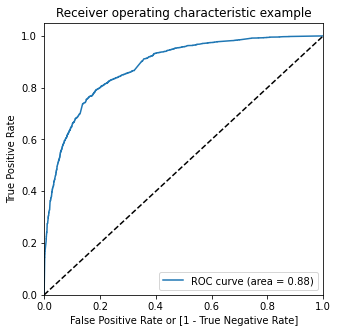

In [164]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Accuracy Vs Sensitivity Vs Specificity

In [165]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.819829,7962,1,1,1,1,1,1,1,1,1,1,0
1,0,0.142681,5520,0,1,1,0,0,0,0,0,0,0,0
2,0,0.379601,1962,0,1,1,1,1,0,0,0,0,0,0
3,1,0.944236,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.224705,9170,0,1,1,1,0,0,0,0,0,0,0


In [166]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.379630,1.000000,0.000000
0.1,0.1,0.624294,0.973543,0.410574
0.2,0.2,0.734149,0.921042,0.619782
0.3,0.3,0.783114,0.832989,0.752593
0.4,0.4,0.805869,0.776767,0.823678
0.5,0.5,0.807910,0.671352,0.891475
0.6,0.6,0.799906,0.590740,0.927903
0.7,0.7,0.783584,0.512609,0.949406
0.8,0.8,0.758161,0.413394,0.969137
0.9,0.9,0.711237,0.255891,0.989881


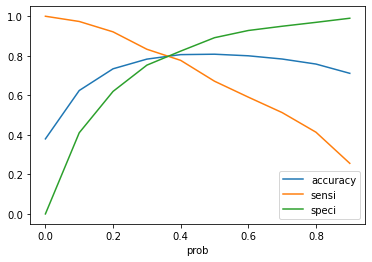

In [167]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- **Let us assume the optimal cut off point to be `0.35`**

In [168]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.819829,7962,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.142681,5520,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.379601,1962,0,1,1,1,1,0,0,0,0,0,0,1
3,1,0.944236,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.224705,9170,0,1,1,1,0,0,0,0,0,0,0,0


### Adding Lead Score column in train data

In [169]:
y_train_pred_final['Lead Score'] = y_train_pred_final['Converted_prob'] * 100
y_train_pred_final['Lead Score'] = y_train_pred_final['Lead Score'].astype(int)
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead Score
0,0,0.819829,7962,1,1,1,1,1,1,1,1,1,1,0,1,81
1,0,0.142681,5520,0,1,1,0,0,0,0,0,0,0,0,0,14
2,0,0.379601,1962,0,1,1,1,1,0,0,0,0,0,0,1,37
3,1,0.944236,1566,1,1,1,1,1,1,1,1,1,1,1,1,94
4,0,0.224705,9170,0,1,1,1,0,0,0,0,0,0,0,0,22


### <font color = blue>Model Evaluation:</font>

In [170]:
# Creating confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3127,  826],
       [ 465, 1954]], dtype=int64)

In [171]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

0.7973948524795983


In [172]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [173]:
# Let's see the sensitivity/Recall of our logistic regression model
TP / float(TP+FN)

0.8077718065316246

In [174]:
# Let us calculate specificity
TN / float(TN+FP)

0.7910447761194029

### Precision and Recall

In [175]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3127,  826],
       [ 465, 1954]], dtype=int64)

In [176]:
# Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7028776978417266

In [177]:
# Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8077718065316246

- **As per our requirement, the convertion rate should be more than 80%**
- **The model is providing a convertion rate of `80.8%` which is nothing but the Sensitivity or Recall of model**

## Making Predictions on Test dataset

In [178]:
numlist

['TotalVisits', 'Total Time Spent on Website']

In [179]:
X_test[numlist] = scaler.transform(X_test[numlist])

In [180]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Country_Indian,Country_Non_Indian,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3504,0,-0.103815,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4050,0,-0.881052,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7201,1,0.424120,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1196,0,-0.105648,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8219,0,-0.428274,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [181]:
X_test.shape

(2731, 30)

In [182]:
X_train.shape

(6372, 56)

In [183]:
new_col = X_train_new.columns

In [184]:
X_test = X_test[new_col]
X_test.shape

(2731, 17)

In [185]:
X_test_sm = sm.add_constant(X_test)

### Predictions on Test Data:

In [186]:
y_test_pred = res.predict(X_test_sm)

In [187]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [188]:
# Let's see the head
y_pred_1.head()

,0
3504,0.242438
4050,0.943881
7201,0.303718
1196,0.242109
8219,0.095099


In [189]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [190]:
# Putting Lead Number to index
y_test_df['Lead Number'] = y_test_df.index

In [191]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [192]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [193]:
y_pred_final.head()

,Converted,Lead Number,0
0,0,3504,0.242438
1,1,4050,0.943881
2,0,7201,0.303718
3,0,1196,0.242109
4,1,8219,0.095099


In [194]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [195]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead Number','Converted','Converted_prob'], axis=1)

In [196]:
y_pred_final.head()

,Lead Number,Converted,Converted_prob
0,3504,0,0.242438
1,4050,1,0.943881
2,7201,0,0.303718
3,1196,0,0.242109
4,8219,1,0.095099


In [197]:
# Adding lead score in Test data
# Calculating Lead Score = Converted_prob * 100

y_pred_final['Lead Score'] = y_pred_final.Converted_prob.map(lambda x: round(x*100))

In [198]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)

In [199]:
y_pred_final.head()

,Lead Number,Converted,Converted_prob,Lead Score,final_predicted
0,3504,0,0.242438,24,0
1,4050,1,0.943881,94,1
2,7201,0,0.303718,30,0
3,1196,0,0.242109,24,0
4,8219,1,0.095099,10,0


### <font color = blue>Model Evaluation of Test data:</font>

In [200]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8041010618820945

In [201]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1351,  338],
       [ 197,  845]], dtype=int64)

In [202]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [203]:
# Let's see the sensitivity/Recall of our logistic regression model
TP / float(TP+FN)

0.8109404990403071

In [204]:
# Let us calculate specificity
TN / float(TN+FP)

0.7998815867377146

## Observations:

### Accuracy, Sensitivity (Recall) & Specificity from Train Data set:

1. **Accuracy: `79.7%`**
2. **Sensitivity: `80.8%`**
3. **Specificity: `79.1%`**

### Accuracy, Sensitivity (Recall) & Specificity from Test Data set:

1. **Accuracy: `80.4%`**
2. **Sensitivity: `81.1%`**
3. **Specificity: `80.0%`**

> <u> ***We can see that the final model is fetching almost similar model paramaeters which show us that the model is good to go!*** 

> <u> ***Also, the Sensitivity or Recall is nothing but the convertion rate predicted using the model.***
    
> <u> ***and with the model we are able to predict a converiton rate of 81.1% on test data.***
    
> <u> ***We have also added 'Lead Score' column the train/test dataset and its value will be between 0 to 100 specifying the probability of lead getting converted into a customer, being 100 as highest probability***